# Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Power Spectral Density

The [power spectral density](https://en.wikipedia.org/wiki/Spectral_density#Power_spectral_density) (PSD) is the Fourier transformation of the auto-correlation function (ACF).

### Definition

For a continuous-amplitude real-value weakly stationary process the PSD is defined as

$$\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ \varphi_{xx}[\kappa] \} $$

where $\mathcal{F}_* \{ \cdot \}$ denotes the discrete-time Fourier transformation (DTFT). The PSD quantifies the power per frequency for a random signal.

### Properties

The properties of the PSD can be deduced from the properties of the ACF and the DTFT as

1. From the symmetry of the ACF it follows

    $$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \Phi_{xx}(\mathrm{e}^{\,-\mathrm{j}\, \Omega})$$

2. The quadratic mean of a random signal is given as

    $$ E\{ x[k]^2 \} = \varphi_{xx}[0] = \frac{1}{2\pi} \int\limits_{-\pi}^{\pi} \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) \,\mathrm{d} \Omega $$

    The last relation can be found by introducing the definition of the inverse DTFT.

### Example

In this example the PSD $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j} \,\Omega})$ of a speech signal $x[k]$ is computed by applying a discrete Fourier transformation (DFT) to the auto-correlation function. For better interpretation of the PSD, the frequency axis $f = \frac{\Omega}{2 \pi} \, f_s$ has been chosen, where $f_s$ denotes the sampling frequency of the signal.

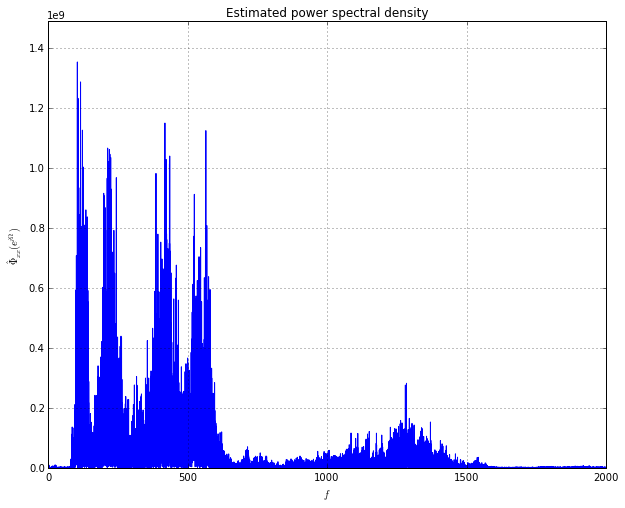

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# read sound file 
fs, x = wavfile.read('../data/speech_8k.wav')
x = np.asarray(x, dtype=float)

# compute and truncate ACF
acf = 1/len(x) * np.correlate(x, x, mode='full')
# compute PSD
psd = np.fft.rfft(acf)
f = fs/(2*len(x)) * np.arange(len(x))

# plot PSD
plt.figure(figsize = (10, 8))
plt.plot(f, np.abs(psd))
plt.title('Estimated power spectral density')
plt.ylabel(r'$\hat{\Phi}_{xx}(e^{j \Omega})$')
plt.xlabel(r'$f$')
plt.axis([0, 2000, 0, 1.1*max(np.abs(psd))]);
plt.grid()

**Exercise**

* What does the PSD tell you about the spectral contents of a speech signal?

## Cross-Power Spectral Density

The cross-power spectral density is the Fourier transformation of the cross-correlation function (CCF). It is defined as follows

$$\Phi_{xy}(\mathrm{e}^{\,\mathrm{j} \, \Omega}) = \mathcal{F}_* \{ \varphi_{xy}[\kappa] \} $$

The symmetries of $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega})$ can be derived from the symmetries of the CCF and the DTFT as

$$ \underbrace {\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\, \Omega}) = \Phi_{xy}^*(\mathrm{e}^{-\,\mathrm{j}\, \Omega})}_{\varphi_{xy}[\kappa] \in \mathbb{R}} = 
\underbrace {\Phi_{yx}(\mathrm{e}^{\,- \mathrm{j}\, \Omega}) = \Phi_{yx}^*(\mathrm{e}^{\,\mathrm{j}\, \Omega})}_{\varphi_{yx}[-\kappa] \in \mathbb{R}} $$

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>